In [13]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [14]:
file_path = '../data/listings_october.csv.gz'

with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        listings = pd.read_csv(file)

In [35]:
listings_features = listings[['id', 'name', 'description', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating','instant_bookable', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'
]]

In [15]:
host_features = listings[['host_id', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
                          'host_is_superhost', 'host_total_listings_count', 
                          'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count', 
                          'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
                          'calculated_host_listings_count_shared_rooms']]

In [28]:
listings_features['bedrooms'].unique()

array([nan,  1.,  5.,  3.,  4.,  2.,  7.,  6., 50.,  8., 14.,  9., 21.,
       26., 10., 15.])

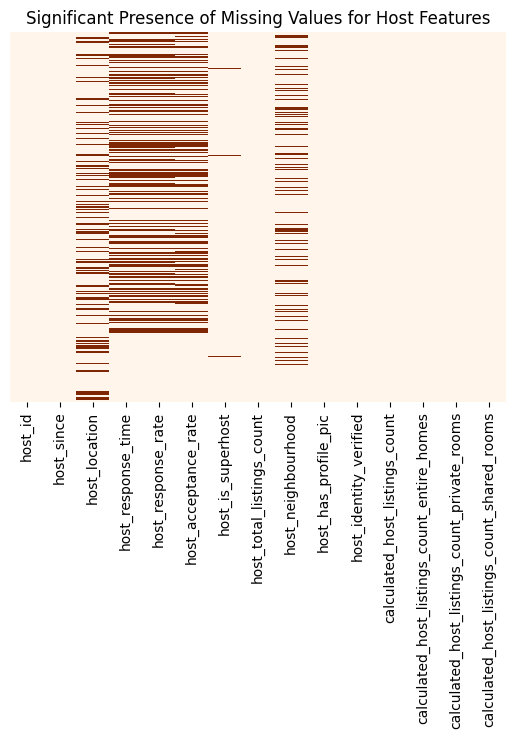

In [51]:
sns.heatmap(host_features.isnull(), cbar=False, cmap='Oranges')
plt.yticks([])
plt.title("Significant Presence of Missing Values for Host Features")
plt.show()

In [17]:
review_dataframe = listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                             'review_scores_communication', 'review_scores_location', 'review_scores_value']]

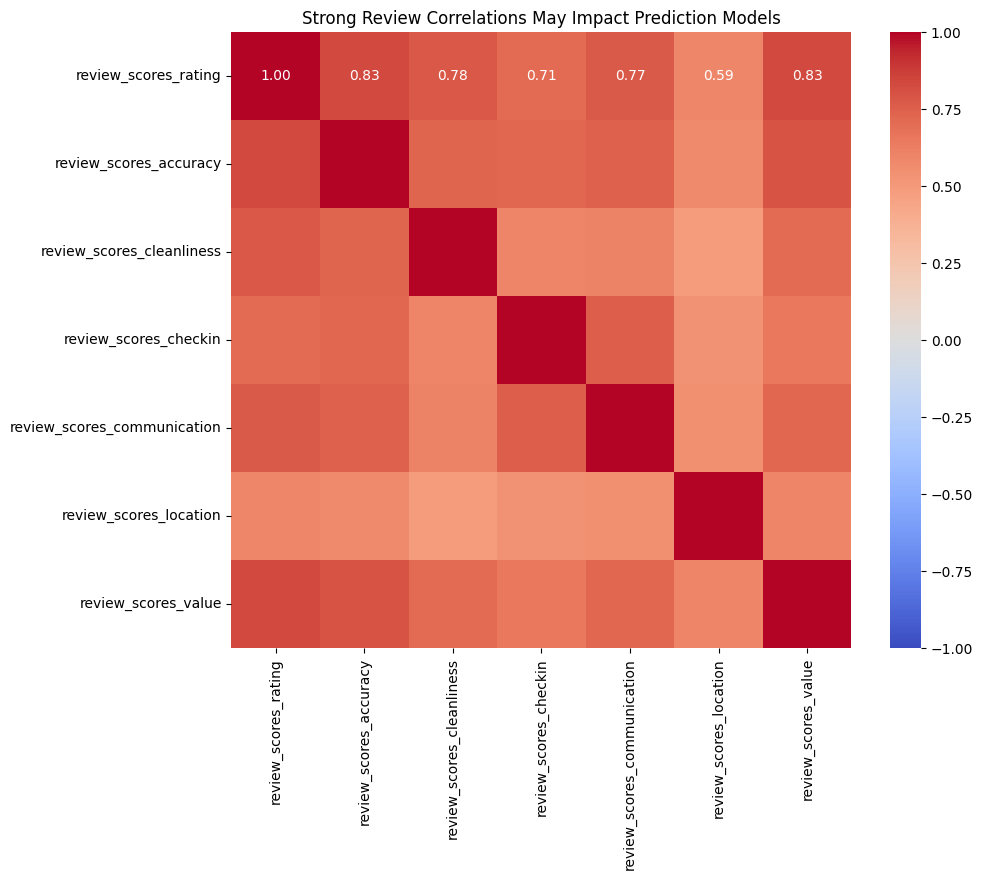

In [40]:
# Calculate the correlation matrix
correlation_matrix = review_dataframe.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Review Correlations May Impact Prediction Models')
plt.show()

In [25]:
listings_features.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['id', 'name', 'description', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'instant_bookable', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')>

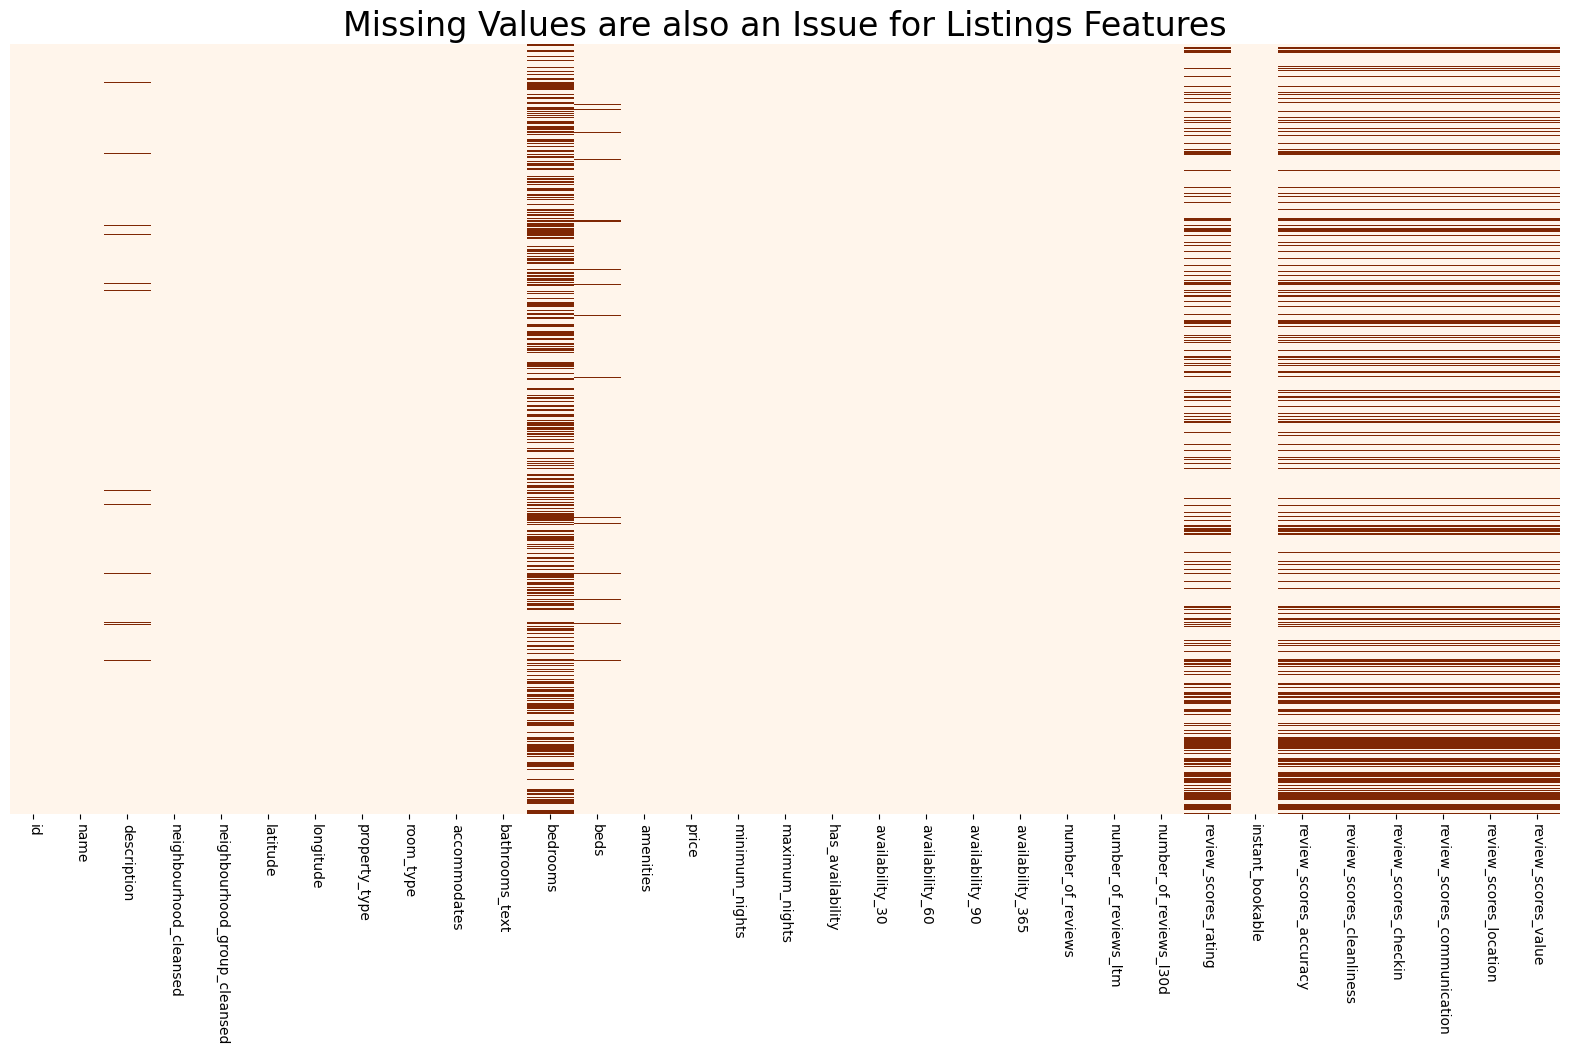

In [50]:
# Increase the size of the heatmap
plt.figure(figsize=(20, 10))  # You can adjust the dimensions as needed
sns.heatmap(listings_features.isnull(), cbar=False, cmap='Oranges')
# Rotate the text on the x-axis 90 degrees to make it vertical
plt.xticks(rotation=270)
plt.yticks([])
plt.title("Missing Values are also an Issue for Listings Features", fontsize=24)
plt.show()

In [31]:
# Count the number of columns of each data type
column_type_counts = listings_features.dtypes.value_counts()

column_type_counts

object     13
int64      11
float64    11
Name: count, dtype: int64

In [38]:
listings_features['name'].unique()

array(['Rental unit in Brooklyn  · ★4.80 · 1 bedroom · 1 bed · 1 shared bath',
       'Rental unit in New York · 1 bedroom · 1 bed · 1 bath',
       'Rental unit in Queens · Studio · 1 bed · 1 bath', ...,
       'Rental unit in New York · ★4.60 · 2 bedrooms · 1 bed · 1 bath',
       'Rental unit in New York · ★4.27 · 2 bedrooms · 3 beds · 1 bath',
       'Rental unit in Brooklyn · ★4.82 · 1 bedroom · 4 beds · 1 bath'],
      dtype=object)